In [22]:
from ect.optimization import ECTFullOptimizer, snr, l1dist
from ect.helpers import Mode, MultimodalGenerator, SingleImageGenerator
from matplotlib import pyplot as plt

In [23]:
# mode = [Mode(100, 45), Mode(100, -45)]
mode = [Mode(20*x, 90-9*x, 1) for x in range(1,20)]
# mode = [Mode(100/x, 9*x, 1) for x in range(1, 20)]
# gen = MultimodalGenerator(mode, offset=10)
gen = SingleImageGenerator("./images/sailboat.jpg")
# gen = RandUnimodalGenerator(offset=5, iterlen=3)
opt = ECTFullOptimizer(gen, snr, offset=10, ect_offset=1, n_knots=20)

2024-05-30 23:39:49.782 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-30 23:39:49.787 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


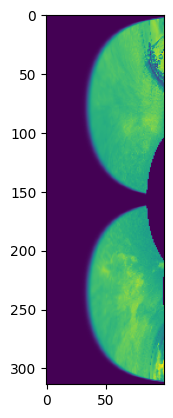

In [24]:
plt.imshow(gen.generate())

In [25]:
r = opt.optim(method="Nelder-Mead", options={"adaptive":True, "maxiter":1e7})

# r = opt.optim()

# import json
# print(json.dumps(r))

Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=-10.983
Current loss=

KeyboardInterrupt: 

In [19]:
r

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -12.239708247002191
        x: [ 3.572e+00 -4.777e+00 ...  4.932e-01  1.322e-01]
      nit: 71
      jac: [-5.239e-01 -1.204e-02 ...  4.761e-02  7.701e-01]
 hess_inv: [[ 1.547e+01 -1.254e+02 ... -1.538e+00 -2.470e+00]
            [-1.254e+02  1.033e+03 ...  1.264e+01  2.027e+01]
            ...
            [-1.538e+00  1.264e+01 ...  1.555e-01  2.488e-01]
            [-2.470e+00  2.027e+01 ...  2.488e-01  3.996e-01]]
     nfev: 7967
     njev: 185

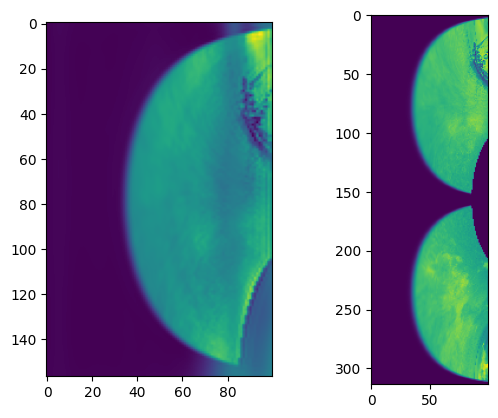

In [20]:
plt.subplot(1,2,1)
plt.imshow(opt.inv)

plt.subplot(1,2,2)
plt.imshow(opt.image.generate())

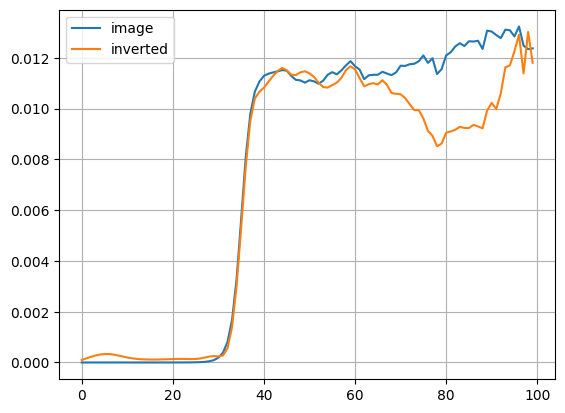

In [21]:
import cv2
P, _ = opt.image.generate().shape
inorm = cv2.normalize(opt.image.generate()[:P//2, :], None, 1, 0, cv2.NORM_L2)
invnorm = cv2.normalize(opt.inv, None, 1, 0, cv2.NORM_L2)

plt.plot(inorm[78, :])
plt.plot(invnorm[78, :])
plt.legend(["image", "inverted"])
plt.grid()

from ect.optimization import snr
from icecream import ic
# ic(snr(inorm, invnorm))

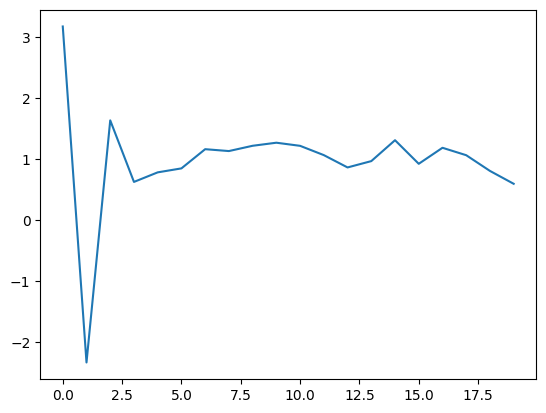

In [11]:
plt.plot(r["x"][:20])

In [12]:
old_fnf = [3.183, -2.054, 1.522, 0.821, 1.511, 0.907, 1.114, 0.934, 1.085, 1.063, 0.979, 1.051, 0.941, 1.005, 0.983, 0.978, 1.079, 1.027, 0.818, 0.608]

fnf = r["x"][:20]
print(f"[{', '.join(f'{x:.3f}' for x, y in zip(fnf, old_fnf))}]")

[3.180, -2.337, 1.638, 0.628, 0.785, 0.850, 1.165, 1.134, 1.221, 1.271, 1.220, 1.068, 0.865, 0.969, 1.312, 0.925, 1.188, 1.066, 0.808, 0.597]


In [13]:
old_snf = [1.747, 1.743, 1.731, 1.724, 1.708, 1.710, 1.728, 1.723, 1.752, 1.749, 1.762, 1.862, 1.888, 1.894, 1.850, 1.861, 1.720, 1.650, 1.578, 1.202]


snf = r["x"][20:40]
print(f"[{', '.join(f'{x:.3f}' for x,y in zip(old_snf, snf))}]")

[1.747, 1.743, 1.731, 1.724, 1.708, 1.710, 1.728, 1.723, 1.752, 1.749, 1.762, 1.862, 1.888, 1.894, 1.850, 1.861, 1.720, 1.650, 1.578, 1.202]


[0.38903346 0.11356679]


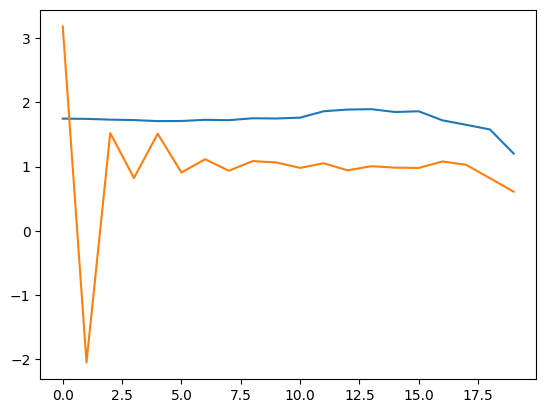

In [14]:
plt.plot(old_snf)
plt.plot(old_fnf)

print(r["x"][40:])